## В этом Notebook:
1. Вы познакомитесь с еще одной библиотекой по визуализации данных Seaborn
2. Посмотрим как рисовать одномерные рисунки с помощью Seaborn
3. Научимся рисовать в Seaborn такие же графики как в Matplotlib, а также познакомимся с новыми типами графиков

In [ ]:
# Выполни прежде чем проходить Notebook
from google.colab import drive
import os
drive.mount ('/content/gdrive', force_remount=True)

%run /content/gdrive/MyDrive/03_Data_Visualization/0_package_installation.ipynb
# Перезагрузка ядра
os.kill(os.getpid(), 9)

Mounted at /content/gdrive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: matplotlib
    Found existing installation

## Одномерный анализ с помощью Seaborn
Допустим вы задаетесь вопросом: "Да, Matplotlib - это здорово, он позволяет мне настраивать все, что я захочу. Но есть ли какая-нибудь другая библиотека визуализации, способная создать красивый график с меньшим количеством кода?"

На самом деле, существует множество библиотек визуализации для Python. Мы изучим Seaborn, которая построена на основе Matplotlib.

Сильной стороной Seaborn является возможность создавать привлекательные, эстетически приятные графики, интегрируя функциональные возможности Pandas датафреймов. До сих пор для создания графиков нам всегда требовалось "извлечь" серию из DataFrame, а затем применить какую-либо функцию. Seaborn, с другой стороны, работает со всем набором данных, разумно используя индексы DataFrame и внутренне выполняя необходимые действия. Seaborn создает визуализации очень простыми и интуитивно понятными благодаря использованию высокоуровневых функций.

## 1. Импорт библиотеки Seaborn и загрузка данных
Импортируем библиотеку Seaborn и дадим ей общепринятый псевдоним **sns**. Аббревиатура происходит от имени Сэмюэля Нормана "Сэма" Сиборна. Это вымышленный персонаж, которого изображал Роб Лоу в многосерийной телевизионной драме "Западное крыло". Таким образом, это шутливый инициализм.

In [ ]:
# Импортируем библиотеку seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Загрузка набора данных
Мы будем использовать набор данных 'penguins', который можно загрузить с помощью функции **load_dataset()**, возвращающей Pandas DataFrame.

Этот набор данных состоит из 7 атрибутов и 344 наблюдений за пингвинами с островов архипелага Палмера в Антарктиде.

**Описание атрибутов**
- species: вид пингвина (Adelie, Gentoo и Chinstrap)
- island: название острова (Biscoe, Dream, Torgersen)
- bill_length_mm: длина клюва (в мм)
- bill_depth_mm: глубина клюва (в мм)
- flipper_length_mm: длина ласт (в мм)
- body_mass_g: масса тела (в граммах)
- sex: пол пингвина

In [ ]:
penguins = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/penguins.csv')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# Удаляем строчки с NaN значением
penguins.dropna(inplace = True)

In [ ]:
# Проверяем наличие дублей
penguins.duplicated().sum()

0

## 3. Числовые переменные
### 3.1 Гистограмма
**displot()** - это гибко настраиваемый график оценки одномерного распределения по выборке, где размер вывода можно изменить с помощью параметров **height** и **aspect**.В случае с осями (x, y) **Axes** размер можно контролировать с помощью **plt.figure(figsize = (Ширина, высота в дюймах))**. Всю необходимую информацию вы можете найти в документации Seaborn.

 ```python:
sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```
- a — выборка;
- bins — число бинов гистограммы. Если None, то выставляется по правилу Freedman-Diaconis;
- hist — рисовать ли гистограмму;
- kde — рисовать ли kde;
- rug — рисовать ли точки выборки в виде штрихов;
- hist_kws, kde_kws, rug_kws — параметры гистограммы, kde и rugplot в виде словарей;
- fit — семейство распредений. Объект должен иметь метод fit, который вернет ОМП в виде tuple, и метод pdf, который по сетке посчитает плотность распределения с параметрами, соответствующими ОПМ. Например, подойдет распределение из scipy.stats. Если параметр указан, что будет нарисована плотность, соответствующая ОМП в данном классе;
- color — цвет;
- vertical — повернуть график;
- norm_hist — нормировать ли гистограмму.

Функция **displot()** использует тот же базовый код, что и функция **histplot()**. Однако она предоставляет различные подходы для визуализации распределения. По умолчанию будет построена гистограмма. Но мы можем выбрать конкретный подход с помощью параметра **kind**:
- kind = 'hist'
- kind = 'kde'
- kind = 'ecdf'

Все эти подходы к визуализации распределения имеют свою собственную функцию в модуле распределения и относятся к категории графиков распределения. Мы обсудим все подходы позже.

Теперь давайте посмотрим, как можно отобразить распределение длины клювов пингвинов.
Функция **displot()** возвращает объект FacetGrid от Matplotlib. Вы можете присвоить полученный объект переменной **ax**, чтобы иметь возможность добавить такие вещи, как заголовок или наименования осей.

Другой способ - использовать **plt.title()**,**plt.xlabel()** и **plt.ylabel()**.

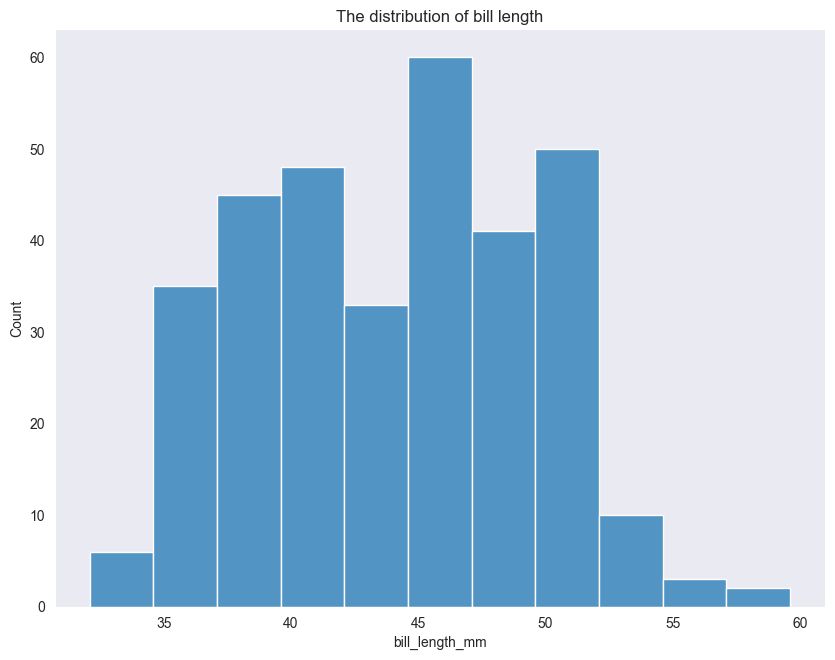

In [ ]:
# Создаем гистограмму для 'bill_length_mm'
ax = sns.displot(data = penguins,
                 x = 'bill_length_mm',
                 height = 6.5,
                 aspect = 1.3);

# Прописываем заголовок
ax.set(title = 'The distribution of bill length');

Как вы можете видеть, Seaborn автоматически аннотирует названия переменных в соответствии с заданными параметрами. Из графика видно, что наиболее распространенная длина клюва составляет около 45 мм. Очень мало пингвинов, у которых длина клюва меньше 10 мм.

Как мы уже узнали, всегда уместно экспериментировать и пробовать разные количества бинов, а также изменять их размер. По умолчанию функции построения графиков **displot()** и **histplot()** определяют размер бинов, основываясь на количестве наблюдений и дисперсии.

Если вы хотите приблизить конкретную область гистограммы, вы можете сделать это, ограничив ось с помощью функции **xlim (аналогично ylim)** в Matplotlib.
- **plt.xlim(left, right)** - установка значений для левой и правой границы
- **plt.xlim(left)** - установка значения только для левой границы
- **plt.xlim(right)** - установка значения только для правой границы

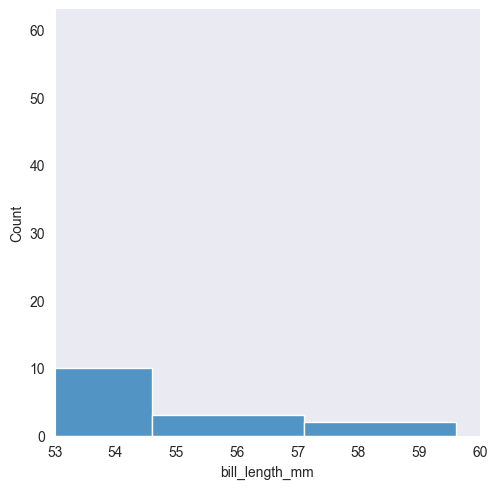

In [ ]:
sns.displot(data = penguins,
            x = 'bill_length_mm')
# Устанавливаем лимиты отображение по оси x справа и слева
plt.xlim(53,60);

Изменить размер бинов можно с помощью параметра **binwidth**. Если мы установим binwidth = 2, каждый бин будет собирать наблюдения в диапазоне 2 мм:

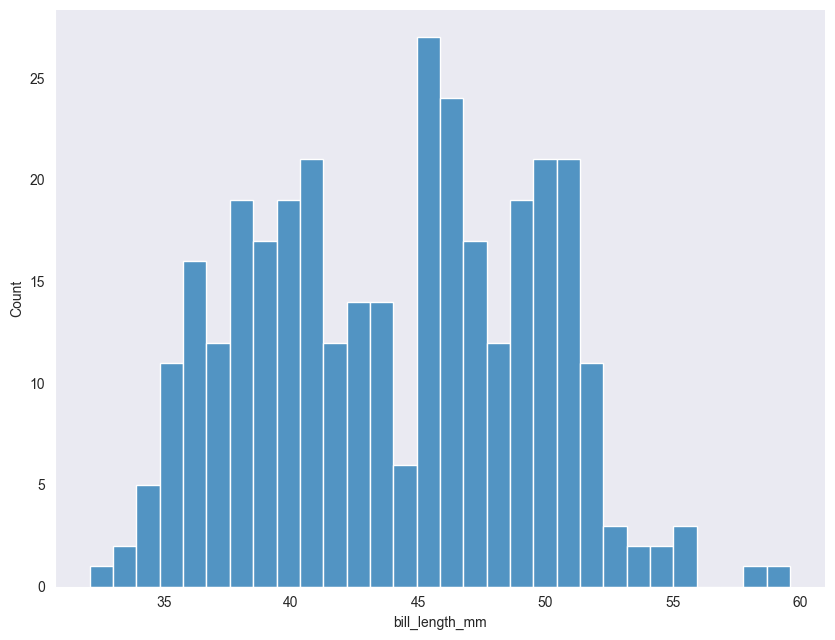

In [ ]:
# Гистограмма с заданной шириной бина
sns.displot(data = penguins,
            x = 'bill_length_mm',
            bins = 30,
            height = 6.5,
            aspect = 1.3);
# Измените размер бинов самостоятельно и понаблюдайте за результатом

Не существует правильного ответа на вопрос о том, какое количество бинов следует установить.

Это всегда зависит от данных, и наша цель - выбрать наиболее подходящий вариант, который лучше всего описывает данные. Если мы не будем пытаться изменить количество бинов в процессе исследования, мы можем потерять важные закономерности.

Вы можете назначить количество бинов параметру **bins**.

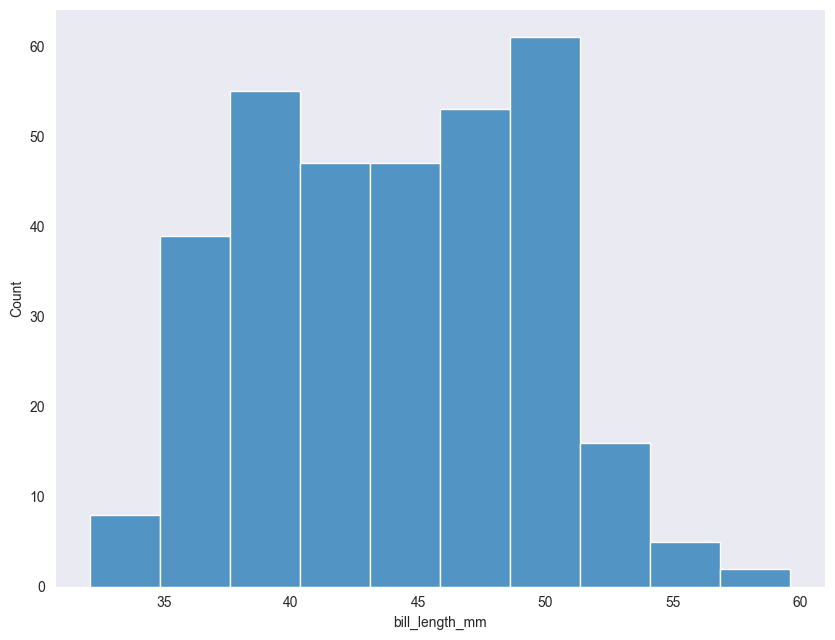

In [ ]:
# Гистограмма с заданным количеством бинов
sns.displot(data = penguins,
            x = 'bill_length_mm',
            bins = 10,
            height = 6.5,
            aspect = 1.3);
# Снова замените количество бинов и понаблюдайте за результатом

На приведенной выше гистограмме видно, что количество бинов слишком велико, так как разрыв появился после значения 55. Попробуйте сами изменить это число и понаблюдайте за результатом.

### Задача 3.1
1. Создайте гистограмму, показывающую распределение массы тела пингвинов (переменная "body_mass_g")
2. Просто определите данные и переменную и позвольте Seaborn создать график по умолчанию
3. Установите параметры: height = 6.5, aspect = 1.3

In [ ]:
# Начните писать свой код ниже


Что вы можете сказать о распределении массы тела? Правильно ли бины по умолчанию отражают закономерности в данных? Каков наиболее распространенный вес пингвинов?

### 3.2 Построение графика распределения с помощью KDE plot

Аббревиатура KDE расшифровывается как Kernel Density Estimate, и с помощью этого подхода мы можем создать распределение с непрерывной кривой плотности вероятности. KDE рассчитывается по специальной формуле. Конечно, вам не нужно беспокоиться об этом. Однако существуют математические и статистические причины, по которым иногда целесообразнее показать KDE

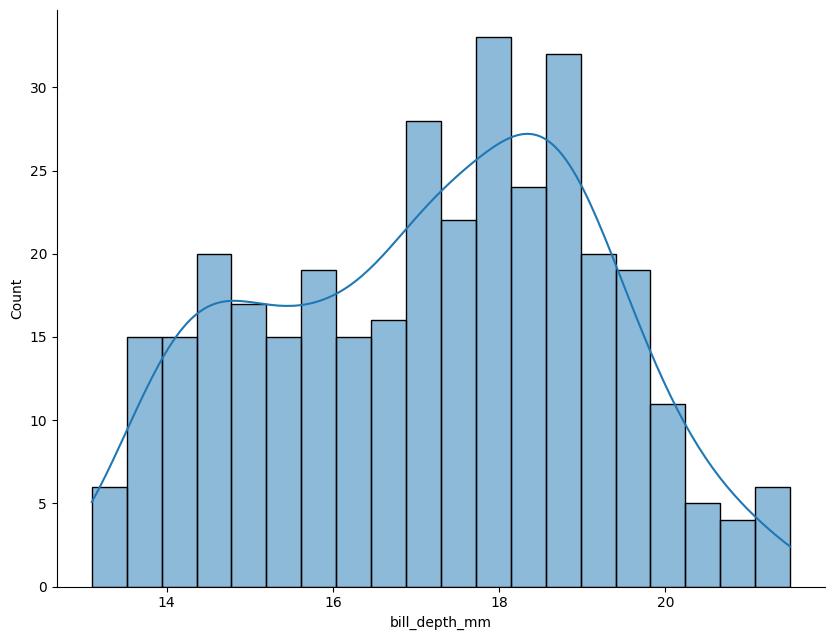

In [ ]:
# Распределение с использованием KDE = True
sns.displot(data = penguins,
            x = 'bill_depth_mm',
            bins = 20,
            kde = True,
            height = 6.5,
            aspect = 1.3);

### 3.4 Ящик с усами
Теперь мы посмотрим на распределение массы тела пингвинов с помощью ящика с усами. \
Box plot (ящика с усами) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.
Функция **boxplot()** в Seaborn принимает несколько параметров,чтобы узнать больше, обратитесь к документации [здесь](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

 ```python:
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
 ```
- x, y, hue — одномерные данные или имена переменных из data. Параметр hue отвечает за категории данных;
- data — данные;
- orient: "v" | "h" — ориентация (вертикальная или горизонтальая);
- color и palette — задают цвет.

Ниже показано, как выглядит стандартный boxplot. Мы передали наш набор данных в **data** параметр и переменная 'body_mass_g' в качестве входного параметра x.

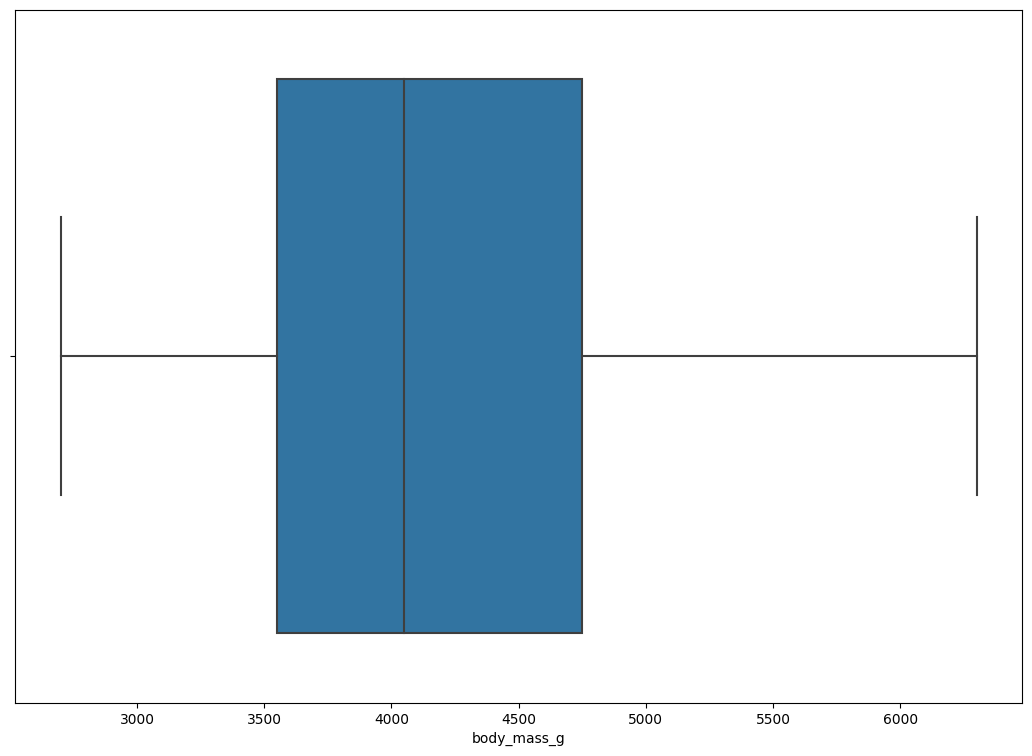

In [ ]:
plt.figure(figsize=(13,9))
sns.boxplot(data = penguins,
            x = 'body_mass_g');

## 3.4.1 Настройка ящика с усами
Если вы хотите дополнительно настроить boxplot, вы можете сделать это с помощью Matplotlib.

Поскольку ящик с усами в Seaborn является более причудливой версией боксплота Matplotlib, вы снова можете использовать те же параметры для управления внешним видом ящика с усами. Например, изменить стиль коробки (boxprops), усов (whiskerprops), подчеркнуть медианное значение (medianprops) или выбросы (flierprops), если они присутствуют.

Вы можете указать и передать эти свойства в словаре, а затем вставить его в функцию **boxplot**.

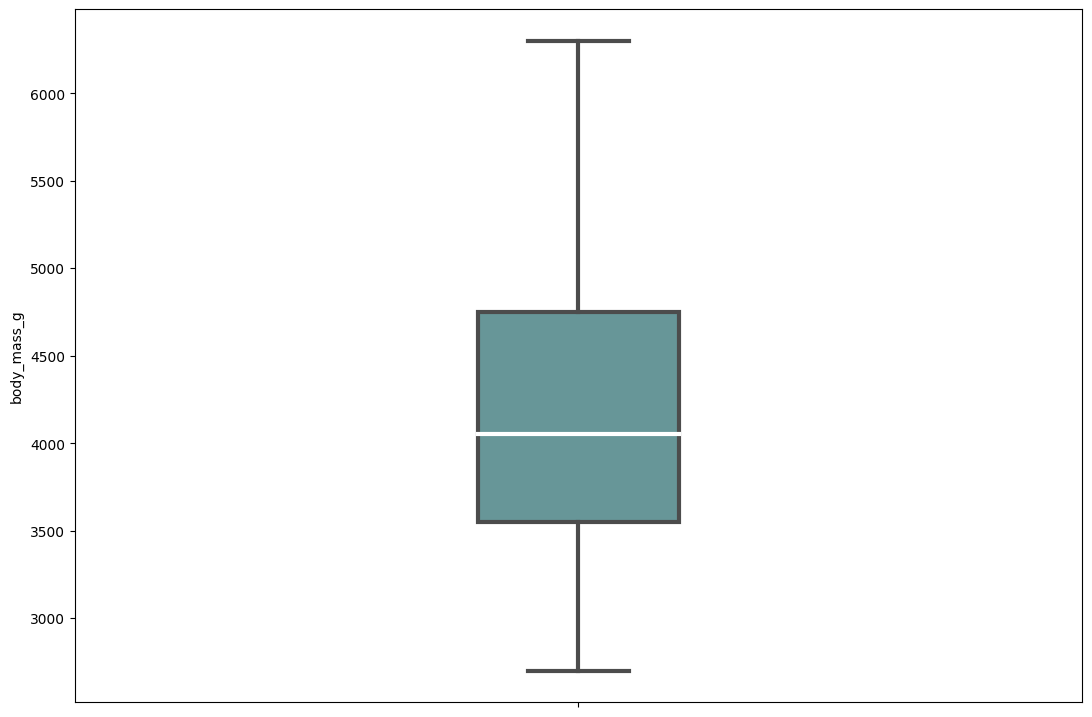

In [ ]:
plt.figure(figsize=(13,9))
sns.boxplot(data = penguins,
            y = 'body_mass_g',
            color = 'cadetblue',
            width = 0.2,
            linewidth = 3,
            medianprops={'color':'white'});

В нашем примере мы настраиваем цвет, ширину боксплота и ширину линий. Изменение цвета линии, представляющей медианное значение, может быть полезным для того, чтобы подчеркнуть его.

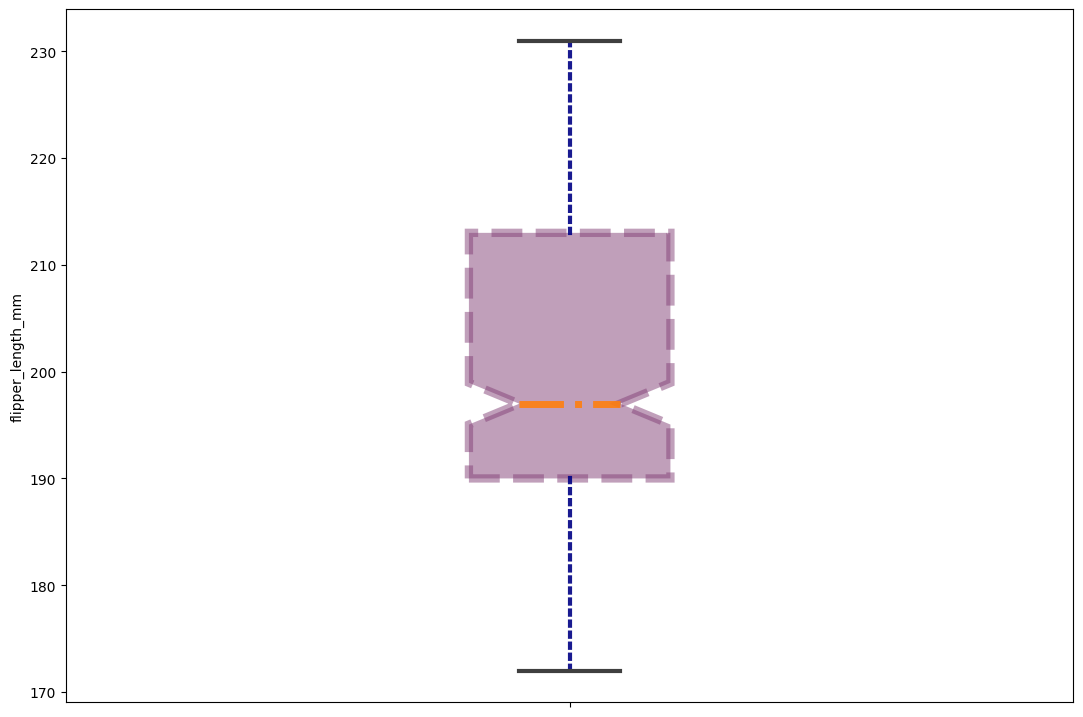

In [ ]:
# Некоторые расширенные настройки
plt.figure(figsize=(13,9))

box_cust = dict(color = '#834177',                # Настройка свойств ящика
                alpha = 0.5,
                linestyle = 'dashed',
                linewidth = 6)

whisker_cust = dict(color = '#000184',            # настройка свойств усов
                    alpha = 0.9,                  # прозрачность
                    linestyle = 'dotted',         # стиль линий
                    linewidth = 3,                # ширина линии
                    dash_capstyle = 'projecting') # стиль пунктирной линии

median_cust = dict(color = '#ff7f0e',
                  alpha = 0.9,
                  linestyle = 'dashdot',
                  linewidth = 5)

ax = sns.boxplot(data = penguins,
                y = 'flipper_length_mm',
                width = 0.2,
                linewidth = 3,
                boxprops = box_cust,
                whiskerprops = whisker_cust,
                medianprops = median_cust,
                notch = True);                    # насечки (насечки представляют доверительный интервал вокруг медианы)

### Задача 3.2
1. Создайте ящшик с усами на переменной 'bill_length_mm'
2. Установите размер рисунка (13,9)
3. Установите цвет в виде шестнадцатеричного кода: '#98D8D8'
4. Установите ширину ящика равной 0,3
5. Установите ширину линии равной 1
6. Измените цвет медианной линии на желтый и ширину линии равной 3 (вы можете указать свойства medianprops в функции boxplot() или вне этой функции)

In [ ]:
## Напишите свой код ниже


## 3.5 Swarmplot
Функция построения **swarmplot()** может быть полезна,если мы хотим лучше увидеть распределение значений. В этом случае каждая точка данных будет отрисована и скорректирована, чтобы избежать наложения значений. Конечно, вы можете создать swarmplot самостоятельно, но приятно видеть нарисованные значения поверх распределения, созданного с помощью **boxplot**.

У **swarmplot()** диаграммы есть один недостаток: если у вас есть набор данных с большим числом наблюдений, скажем, с тысячами, то точки данных будут сильно пересекаться. Однако мы можем сделать случайную выборку только нескольких процентов точек, чтобы иметь возможность использовать **swarmplot()**. В этом случае не забудьте указать рядом с графиком, что **swarmplot()** диаграмма отображает только подвыборку данных. В случае с набором данных о пингвинах swarmplot - хороший выбор метода построения, мы можем хорошо увидеть нарисованные наблюдения.

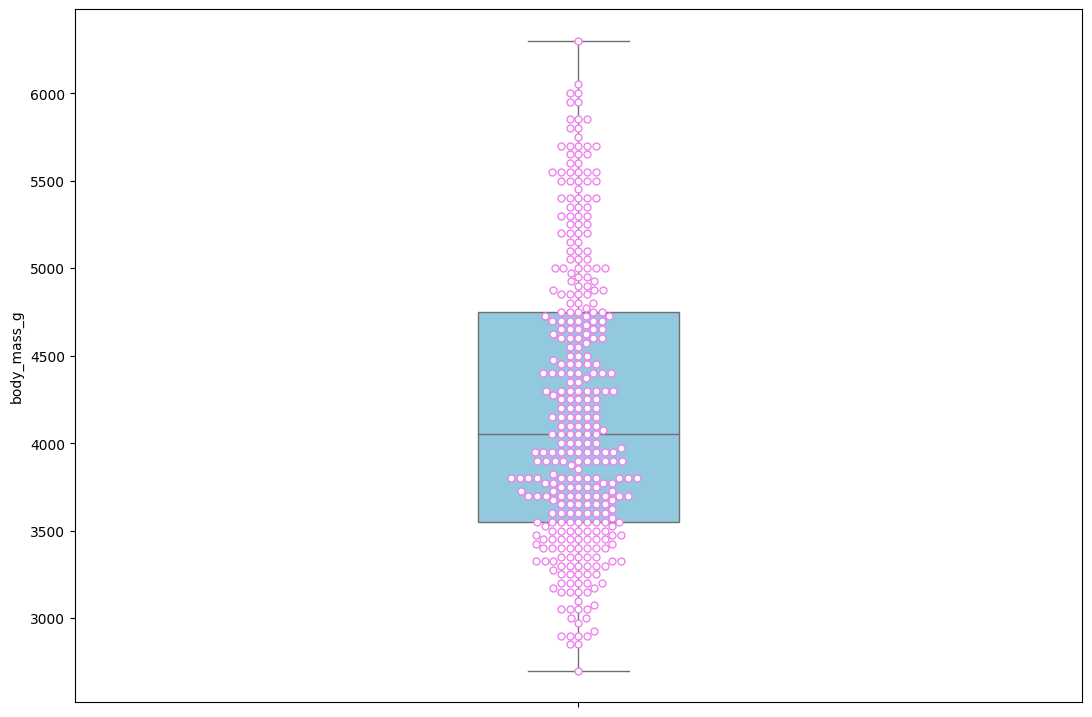

In [ ]:
# Распределение данных, отображаемых с помощью boxplot и swarmplot

plt.figure(figsize=(13,9))
sns.boxplot(data = penguins,
            y = 'body_mass_g',
            color = 'skyblue',
            width = 0.2,
            linewidth = 1)
sns.swarmplot(data = penguins,
              y = 'body_mass_g',
              color = 'white',
              edgecolor = 'violet',    # цвет линии вокруг данных данных
              linewidth = 1);          # Ширина линии

### Задача 3.3
1. Создайте swarmplot график на переменной 'bill_depth_mm'
2. Размер графика (13,9)
3. Установите цвет точек данных на 'red'

In [ ]:
## Напишите свой код ниже


Можете ли вы точно сказать, где находится большинство точек данных, основываясь на нарисованных точках данных? Иногда судить о форме распределения по swarmplot может быть сложно. Чтобы быть уверенным, лучше создавать swarmplot в сочетании с boxplot.

### Задача 3.4
1. Создайте график для переменной 'bill_depth_mm'
2. Создайте график и установите размер: (13,9)
3. Установите ширину ящика с усами 0,2, ширину линии - 3 и цвет -
"белый".
4. Постройте swarmplot диаграмму сразу после ящика с усами (просто
скопируйте и вставьте строку кода с задания 3.3)

In [ ]:
## Напишите свой код ниже


### 3.6 Stripplot
Stripplot очень похож на swarmplot, поскольку также показывают все данные. Имеется тот же недостаток - данные перекрываются, но вы можете добавить некоторый случайный шум (флуктуацию) среди значений. Иногда трудно сказать, какое распределение у данных без дополнительного представления основного распределения (например, созданного с помощью ящика с усами).

Вы можете добавить количество флуктуации с помощью параметра **jitter**, при этом у вас есть 2 варианта:
- установите jitter = True для хорошего значения флуктуации по умолчанию
- указать величину jitter на свое усмотрение

Stripplot могут быть также полезны для выявления выбросов в данных.

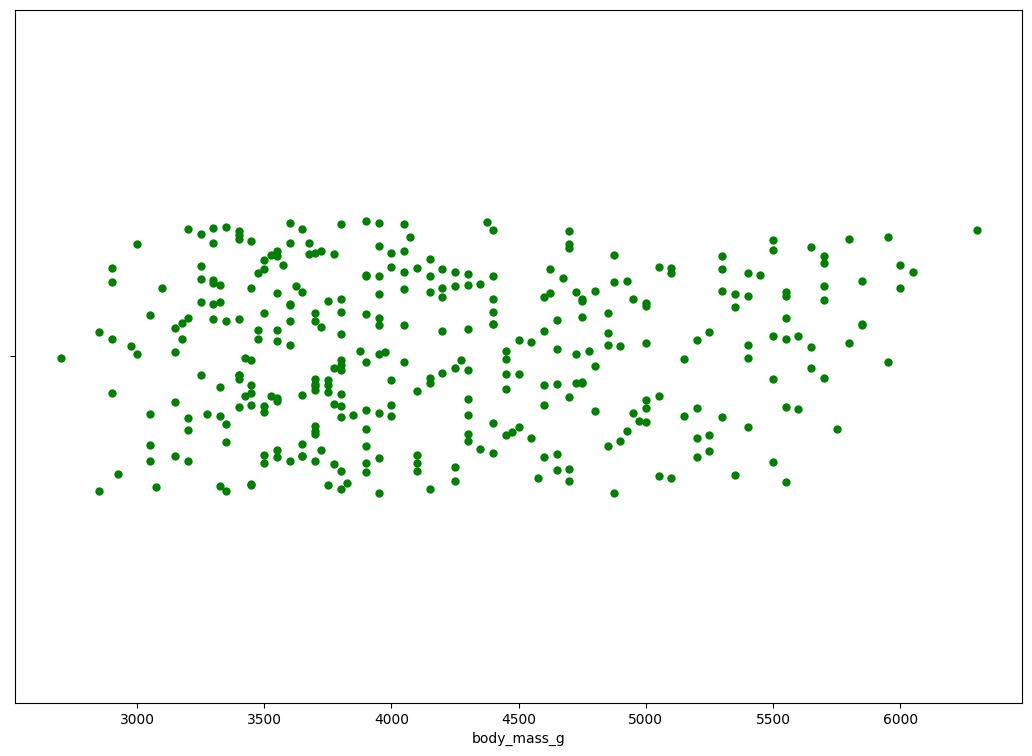

In [ ]:
# Stripplot график переменной 'body_mass_g'

plt.figure(figsize=(13,9))
sns.stripplot(data = penguins,
              x = 'body_mass_g',
              color = 'green',
              jitter = 0.2,
              size = 6);

Поскольку у нас не так много наблюдений, мы можем лучше оценить распределение данных, так как они не пересекаются. Здесь мы можем принять во внимание плотность точек данных, которая может дать нам хорошую апроксимацию к форме. Видно, что в диапазоне 3200-3800 грамм больше точек данных по сравнению с остальными точками данных. После этого точки данных становятся более редкими. Исходя из этого, можно сказать, что распределение выглядит правосторонним. В большинстве случаев не следует считать распределение только по stripplot, так как это может ввести в заблуждение. Поэтому всегда визуализируйте данные, используя несколько подходов к построению графиков.

## 4. Категориальные переменные
### 4.1 Catplot
Для создания визуализации категориальной переменной можно использовать функцию построения графиков **catplot()**. Это интерфейс на уровне рисунка, который позволяет задать определенный тип графика, например, boxplot, используя параметр kind.

Например, если вы хотите визуализировать количество наблюдений в зависимости от конкретной категории, код будет следующим:

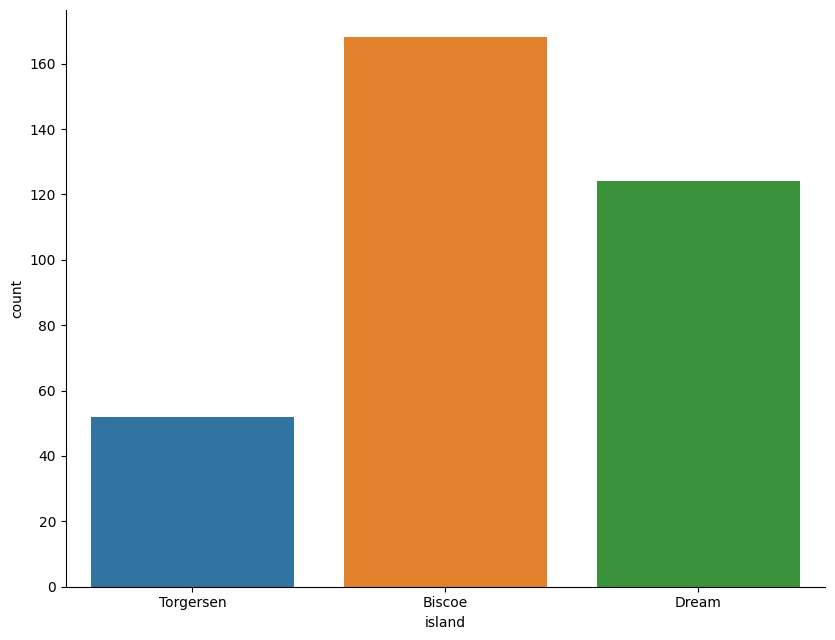

In [ ]:
# Количество пингвинов в зависимости от острова
sns.catplot(data = penguins,
           x = 'island',
           kind = 'count',
           height = 6.5,
           aspect = 1.3);

### 4.2 Countplot
В качестве альтернативы можно использовать функцию построения графиков на уровне осей **sns.countplot()**.

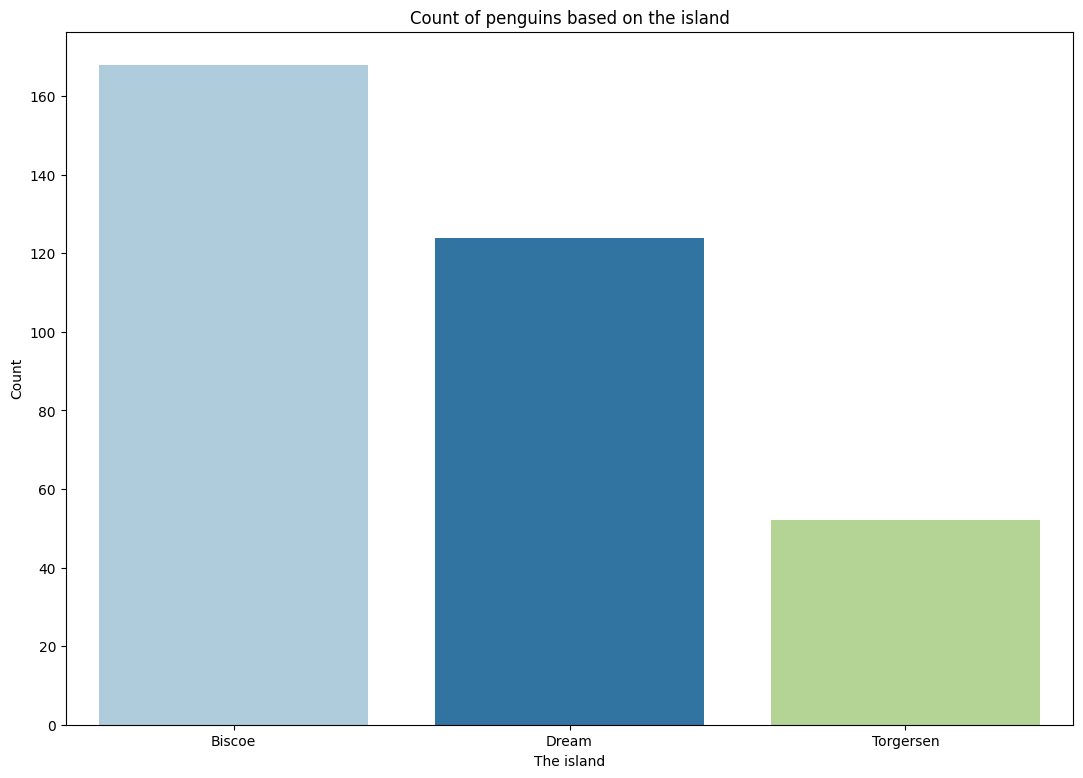

In [ ]:
# Построить график countplot на переменной "island".

plt.figure(figsize = (13,9))
ax = sns.countplot(data = penguins,
                   x = 'island',
                   order = penguins.island.value_counts().index, # Сортируем категории по убыванию
                   palette = 'Paired')
ax.set(title = 'Count of penguins based on the island',
       xlabel = 'The island',
       ylabel = 'Count');

Здесь мы упорядочиваем категории на основе их значений в порядке убывания. Другой способ изменить порядок в зависимости от ваших предпочтений - определить категории в списке: order = ['Biscoe','Dream','Torgersen'].

Все настройки, которые мы сделали, применимы и в **catplot()**

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.species.value_counts(ascending = True)

Chinstrap     68
Gentoo       124
Adelie       152
Name: species, dtype: int64

### Задача 4.1
1. Отобразите количество пингвинов в зависимости от их вида
2. Используйте функцию построения графиков catplot()
3. Расположите виды пингвинов в следующем порядке: 'Chinstrap','Adelie','Gentoo'
4. Установите насыщенность (saturation) цветов на 0,3
5. Измените размер фигуры:
    - height = 6.5
    - aspect = 1.3
6. Установите заголовок: 'Подсчет пингвинов на основе видов'

In [ ]:
# Напишите свой код ниже


## 5. Задачи
Теперь ваша очередь создать визуализацию набора данных "Банковский маркетинг". Эти данные относятся к маркетинговой кампании португальского банковского учреждения, которая проводилась посредством телефонного общения с клиентами банка. Давайте посмотрим на атрибуты и проведем предварительный анализ и обработку.

Описание атрибутов:
- age: возраст клиента
- job: тип работы
- marital:  семейное положение
- education: образование
- default: наступил ли дефолт по кредиту?
- housing: есть ли жилищный кредит?
- loan: есть ли персональный кредит?
- contact: тип связи с клиентом последний раз
- month: последний контактный месяц года
- day_of_week: последний контактный день недели
- duration: продолжительность последнего контакта, в секундах.
- campaign: количество контактов, выполненных во время данной кампании и для данного клиента
- pdays: количество дней, прошедших после последнего контакта с клиентом в рамках предыдущей кампании (999 означает, что с клиентом ранее не связывались)
- previous: количество контактов, выполненных до этой кампании и для этого клиента
- poutcome: результат предыдущей маркетинговой
- emp.var.rate: коэффициент вариации занятости - квартальный показатель
- cons.price.idx: индекс потребительских цен - ежемесячный индикатор
- cons.conf.idx: индекс потребительского доверия - ежемесячный индикатор
- euribor3m: 3-месячная ставка euribor - ежедневный индикатор рассчитывается путем исключения из представленных процентных ставок 15% самых высоких и 15% самых низких и вычисления среднего арифметического оставшихся значений
- nr.employed: количество сотрудников - квартальный
- y - целевая переменная, подписал ли клиент срочный депозит?

### 5.1 Загрузка данных, предварительная обработка

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/bank_data.csv',sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Переименуем некоторые колонки
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [ ]:
# Изучим сводную статистику
data.describe()

,age,contact_duration,number_of_contacts,days_passed,number_previous_contact,emp_variation_rate,cpi,cci,euribor_rate,no_employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Проверка на пропущенные значения
data.isnull().sum()

age                          0
job                          0
marital_status               0
education                    0
default_credit               0
house_loan                   0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
contact_duration             0
number_of_contacts           0
days_passed                  0
number_previous_contact      0
previous_campaign_outcome    0
emp_variation_rate           0
cpi                          0
cci                          0
euribor_rate                 0
no_employees                 0
target                       0
dtype: int64

In [ ]:
# Проверка на дублирование данных
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
# Удаление дублирующихся строк
data.drop_duplicates(inplace = True)

In [ ]:
# Изучите типы данных переменных
data.dtypes

age                            int64
job                           object
marital_status                object
education                     object
default_credit                object
house_loan                    object
loan                          object
contact_type                  object
month                         object
day_of_week                   object
contact_duration               int64
number_of_contacts             int64
days_passed                    int64
number_previous_contact        int64
previous_campaign_outcome     object
emp_variation_rate           float64
cpi                          float64
cci                          float64
euribor_rate                 float64
no_employees                 float64
target                        object
dtype: object

Похоже, что тип данных числовых переменных был правильно распознан Python. Все нечисловые переменные имеют объектный тип данных, поэтому давайте преобразуем их в категории.

In [ ]:
# Выберите все переменные, которые необходимо преобразовать
to_category = ['job','marital_status','education','default_credit','house_loan',
               'loan','contact_type','month','day_of_week', 'previous_campaign_outcome']

In [ ]:
# Преобразовываем их в тип данных категория
for col in to_category:
  data[col] = data[col].astype('category')

Дни и месяцы записаны как их аббревиатуры. Давайте сделаем отображение месяцев с их полным названием.

In [ ]:
# Создайте словарь с исходными значениями и соответствующими новыми значениями для дней недели
mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}

In [ ]:
# Сопоставим новые значения со столбцом 'day_of_week'
data.day_of_week = data.day_of_week.map(mapping_days)

In [ ]:
# Создайте словарь с исходными значениями и соответствующими новыми значениями для месяцев
mapping_months = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}

In [ ]:
# Соотнесите новые значения с колонкой 'месяц'
data.month = data.month.map(mapping_months)

## 5.2 Числовые переменные
Давайте начнем с числовых переменных и изучим распределение точек данных.

### Задача 5.1
1. Создайте гистограмму переменной 'age'
2. Установите параметры: height = 6.5, aspect = 1.3
3. Установите количество бинов на 25
4. Установите заголовок: "Распределение по возрасту"

In [ ]:
# Начните писать свой код ниже



### Задача 5.2
1. Создайте ящик с усами по переменной 'age'
2. Задайте размер рисунка: (13,9)
3. Присвойте переменную 'age' параметру **y**
4. Установите ширину боксплота равной 0,3

In [ ]:
# Начните писать свой код ниже


Значения переменной 'contact_duration' записаны в секундах. Выполните ячейку ниже, чтобы преобразовать их в минуты.

In [ ]:
# Преобразование секунд в минуты
data.contact_duration = data.contact_duration.apply(lambda x: x / 60)

### Задача 5.3
1. Создайте гистограмму по переменной 'contact_duration'
2. Установите ширину бинов на 0,5, так что каждый биновый
комплексный вызов длился 50 секунд

In [ ]:
# Начните писать свой код ниже


Есть несколько записей, где звонок не был выполнен, поэтому соответствующие значения имеют значение 0. Давайте посмотрим, сколько строк не записали продолжительность и отбросим их, так как они не дадут нам никакой полезной информации.

In [ ]:
# Выведим только те строки, в которых 'contact_duration' равен 0
data[data['contact_duration'] == 0]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
6251,39,admin.,married,high.school,no,yes,no,telephone,NaN,Tuesday,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,NaN,Tuesday,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,NaN,Friday,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,NaN,Monday,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [ ]:
# Получить индекс строк, которые должны быть отброшены
index_rows_to_drop = data[data['contact_duration'] == 0].index

In [ ]:
# Удалите эти строки из датафрейма
data.drop(index_rows_to_drop, inplace = True)

### Задача 5.4
1. Пересоздайте гистограмму по колонке 'contact_duration'
2. Задайте параметры: height = 6.5, aspect = 1.3
3. Увеличьте масштаб и установите границы по оси x от 0,5 до 25 минут
4. Установите заголовок: "Продолжительность звонка до 25 минут"

In [ ]:
# Начните писать свой код ниже


Мы уже видели, что распределение точек данных можно визуализировать с помощью stripplot. Когда мы строили график некоторых переменных из набора данных penguins, мы могли наблюдать, как каждая точка данных располагается на рисунке, и пересечение значений было минимальным. Теперь создайте stripplot переменной 'contact_duration' из набора данных Bank marketing, чтобы увидеть, как выглядит stripplot, когда у вас есть тысячи записей.

### Задача 5.5
1. Создайте stripplot по переменной 'contact_duration'
2. Установите размер фигуры: (13,9)

In [ ]:
# Начните писать свой код ниже


## 5.3 Категориальные переменные

In [ ]:
data['job']

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41172, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

### Задача 5.6
1. Создайте график countplot по переменной 'job'
2. Установите размер графика: (13,9)
3. Порядок расположения столбцов должен быть от наиболее распространенной работы до менее
4. Установите поворот меток оси x на 45 градусов с помощью функции xticks() в Matplotlib.
5. Установите цветовую палитру как 'Set3'

In [ ]:
# Начните писать свой код ниже


Теперь мы посмотрим, сколько звонков было совершено в соответствующие месяцы. По какой-то причине в наборе данных отсутствует январь, но не стоит об этом беспокоиться. Для правильной визуализации месяцев года нам необходимо указать их порядок.

In [ ]:
# Уникальные категории
month_order = ['February','March','April','May','Jun','Jul','August','September','October','November','December']

In [ ]:
# Создание CategoricalDtype
order_cat = pd.api.types.CategoricalDtype(categories = month_order, ordered = True)

In [ ]:
# Изменить тип данных переменной month как тип данных order_cat
data.month = data.month.astype(order_cat)

### Задача 5.7
1. Создайте график countplot по переменной 'month', чтобы увидеть, сколько звонков было выполнено за все месяцы.
2. Установите размер графика: (13,9)
3. Установите палитру цветов на 'Pastel1'
4. Установите поворот меток оси x на 45 градусов с
помощью функции xticks() в Matplotlib.

In [ ]:
# Начните писать свой код ниже
